In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Step 2: Load Dataset

In [3]:
df = pd.read_csv("cybersecurity_data.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [4]:
# Remove Duplicate Riws


In [5]:
df_unique = df.drop_duplicates()

In [6]:
df_unique['bytes_in'].fillna(df_unique['bytes_in'].median(), inplace=True)
df_unique['bytes_out'].fillna(df_unique['bytes_out'].median(), inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_12892\2509335326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unique['bytes_in'].fillna(df_unique['bytes_in'].median(), inplace=True)
C:\Users\krish\AppData\Local\Temp\ipykernel_12892\2509335326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [7]:
df_unique['bytes_in'] = df_unique['bytes_in'].fillna(df_unique['bytes_in'].median())
df_unique['bytes_out'] = df_unique['bytes_out'].fillna(df_unique['bytes_out'].median())


In [8]:
df_unique.dropna(subset=['src_ip', 'dst_ip'], inplace=True)

In [9]:
df_unique['creation_time'] = pd.to_datetime(df_unique['creation_time'])
df_unique['end_time'] = pd.to_datetime(df_unique['end_time'])
df_unique['time'] = pd.to_datetime(df_unique['time'])

In [10]:
df_unique['src_ip_country_code'] = df_unique['src_ip_country_code'].str.upper()

In [11]:
df_unique.info()
df_unique.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   bytes_in             282 non-null    int64              
 1   bytes_out            282 non-null    int64              
 2   creation_time        282 non-null    datetime64[ns, UTC]
 3   end_time             282 non-null    datetime64[ns, UTC]
 4   src_ip               282 non-null    object             
 5   src_ip_country_code  282 non-null    object             
 6   protocol             282 non-null    object             
 7   response.code        282 non-null    int64              
 8   dst_port             282 non-null    int64              
 9   dst_ip               282 non-null    object             
 10  rule_names           282 non-null    object             
 11  observation_name     282 non-null    object             
 12  source.meta          2

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


In [12]:
visualize the distribution of bytes in and bytes out

SyntaxError: invalid syntax (302932981.py, line 1)

In [13]:
# visualize the distribution of bytes in and bytes out

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Distribution plot for Bytes In and Bytes Out

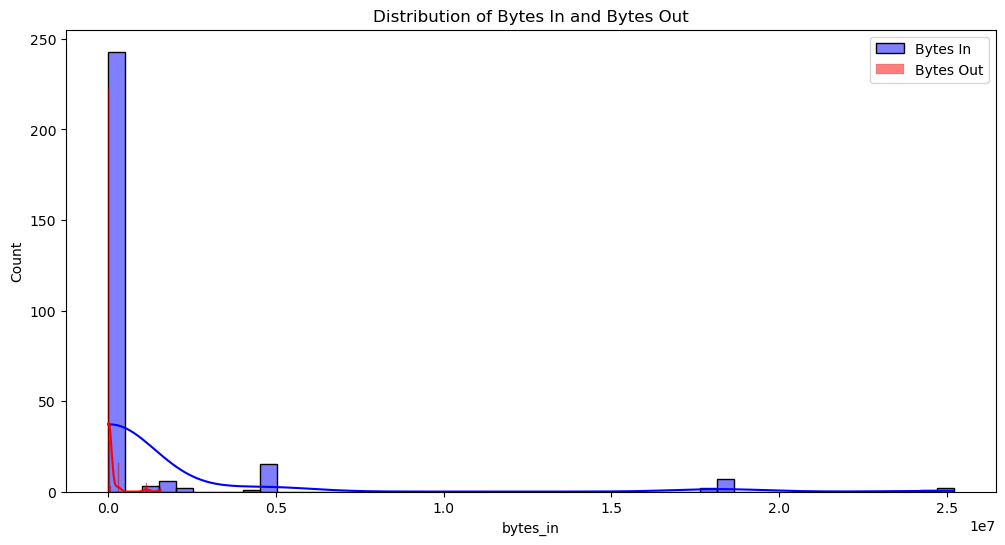

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df_unique['bytes_in'], bins=50, color='blue', kde=True, label='Bytes In')
sns.histplot(df_unique['bytes_out'], bins=50, color='red', kde=True, label='Bytes Out')
plt.legend()
plt.title('Distribution of Bytes In and Bytes Out')
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_12892\1922916102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol', data=df_unique, palette='viridis')


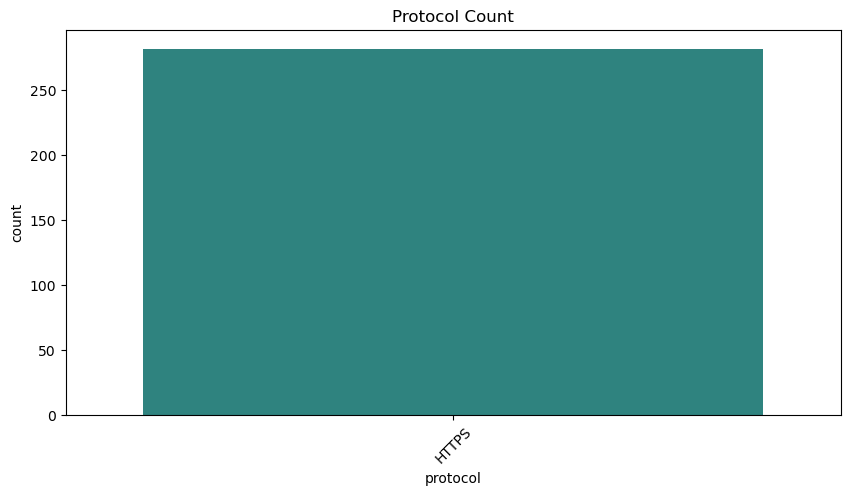

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', data=df_unique, palette='viridis')
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

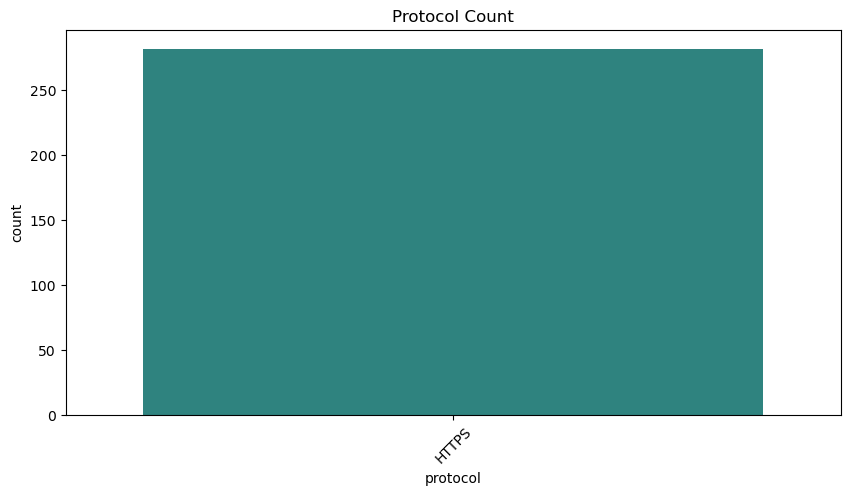

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='protocol', hue='protocol', data=df_unique, palette='viridis', legend=False)
plt.title('Protocol Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Country-Based Interaction Count

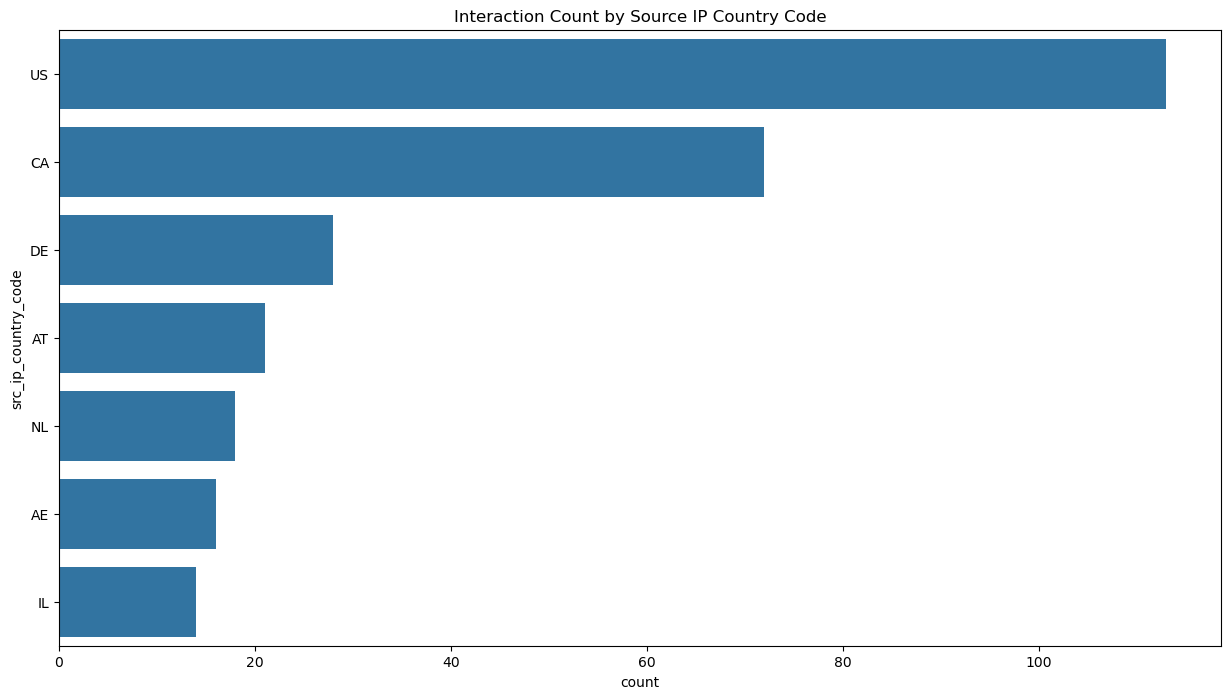

In [20]:
plt.figure(figsize=(15, 8))
sns.countplot(y='src_ip_country_code', data=df_unique,
              order=df_unique['src_ip_country_code'].value_counts().index)
plt.title('Interaction Count by Source IP Country Code')
plt.show()


In [21]:
# Suspicious Activities by Destination Port

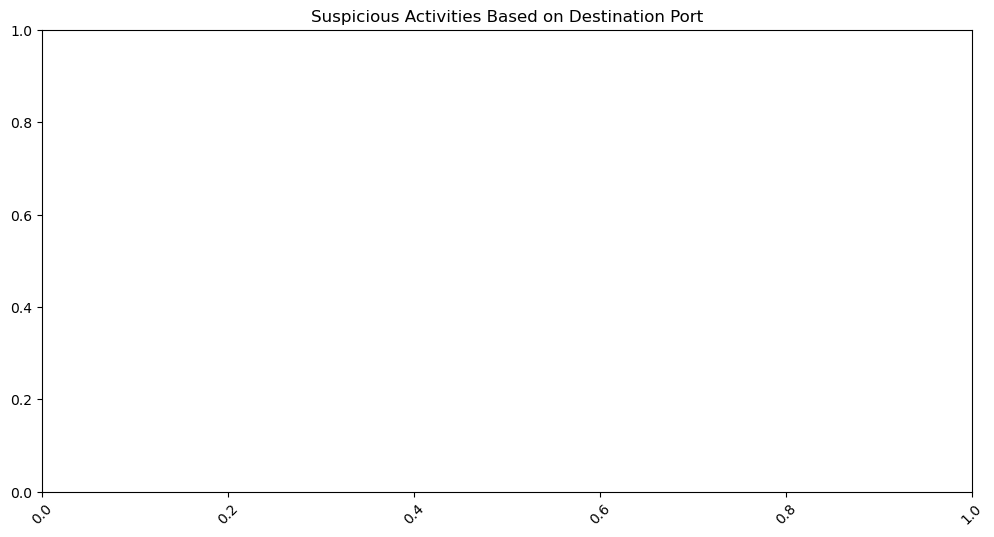

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dst_port', 
              data=df_unique[df_unique['detection_types'] == 'Suspicious'], 
              palette='coolwarm')
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()

In [23]:
df_unique.set_index('cr"eation_time', inplace=False)

plt.figure(figsize=(12, 6))
plt.plot(df_unique['creation_time'], df_unique['bytes_in'], label='Bytes In', marker='o')
plt.plot(df_unique['creation_time'], df_unique['bytes_out'], label='Bytes Out', marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'None of [\'cr"eation_time\'] are in the columns'

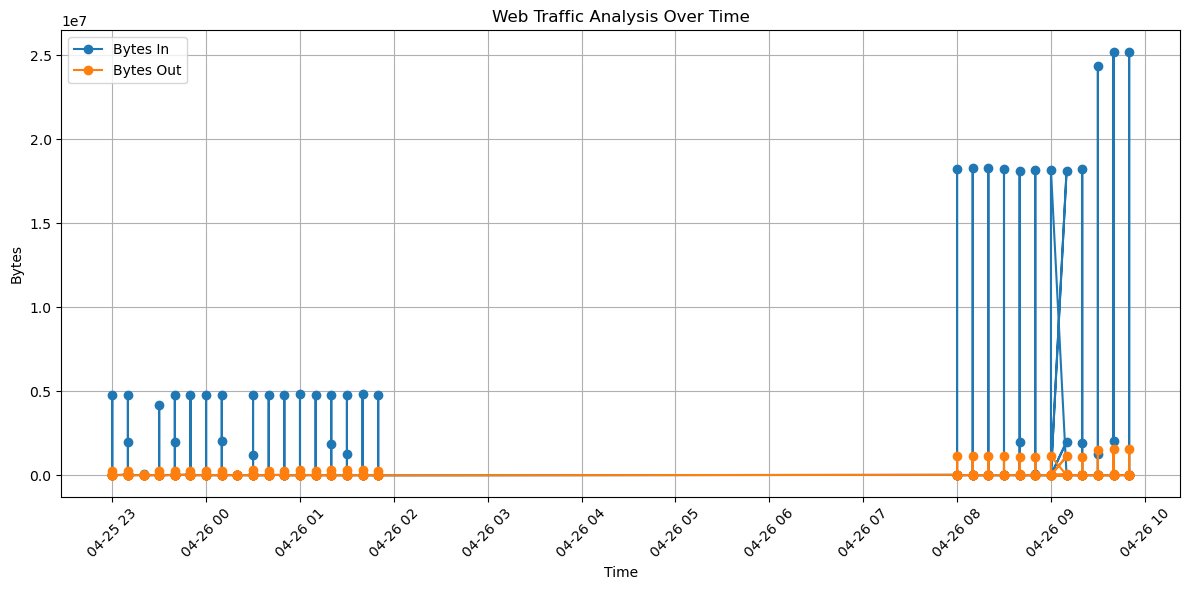

In [24]:
df_unique['creation_time'] = pd.to_datetime(df_unique['creation_time'])

plt.figure(figsize=(12, 6))
plt.plot(df_unique['creation_time'], df_unique['bytes_in'], label='Bytes In', marker='o')
plt.plot(df_unique['creation_time'], df_unique['bytes_out'], label='Bytes Out', marker='o')
plt.title('Web Traffic Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Compute correlation matrix for numeric columns

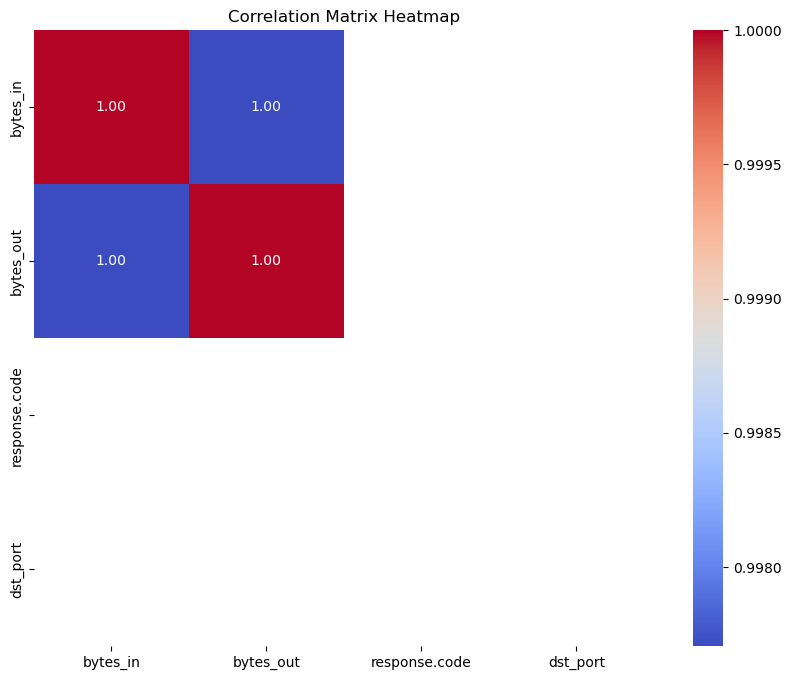

In [26]:
numeric_df = df_unique.select_dtypes(include=['float64', 'int64'])
correlation_matrix_numeric = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [28]:
df_unique['session_duration'] = (df_unique['end_time'] - df_unique['creation_time']).dt.total_seconds()

In [29]:
df_unique['avg_packet_size'] = (df_unique['bytes_in'] + df_unique['bytes_out']) / df_unique['session_duration']

In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_unique[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']])
scaled_columns = ['scaled_bytes_in', 'scaled_bytes_out', 'scaled_session_duration', 'scaled_avg_packet_size']

In [31]:
scaled_df = pd.DataFrame(scaled_features, columns=scaled_columns, index=df_unique.index)

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_unique.index)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_unique[['src_ip_country_code']])
encoded_columns = encoder.get_feature_names_out(['src_ip_country_code'])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=df_unique.index)


In [33]:
df_transformed = pd.concat([df_unique, scaled_df, encoded_df], axis=1)

In [34]:
df_transformed.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,...,scaled_bytes_out,scaled_session_duration,scaled_avg_packet_size,src_ip_country_code_AE,src_ip_country_code_AT,src_ip_country_code_CA,src_ip_country_code_DE,src_ip_country_code_IL,src_ip_country_code_NL,src_ip_country_code_US
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,...,-0.281223,0.0,-0.287850,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,...,-0.260804,0.0,-0.280910,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,...,-0.279344,0.0,-0.282531,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,...,-0.276161,0.0,-0.281883,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,...,-0.277678,0.0,-0.287435,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns



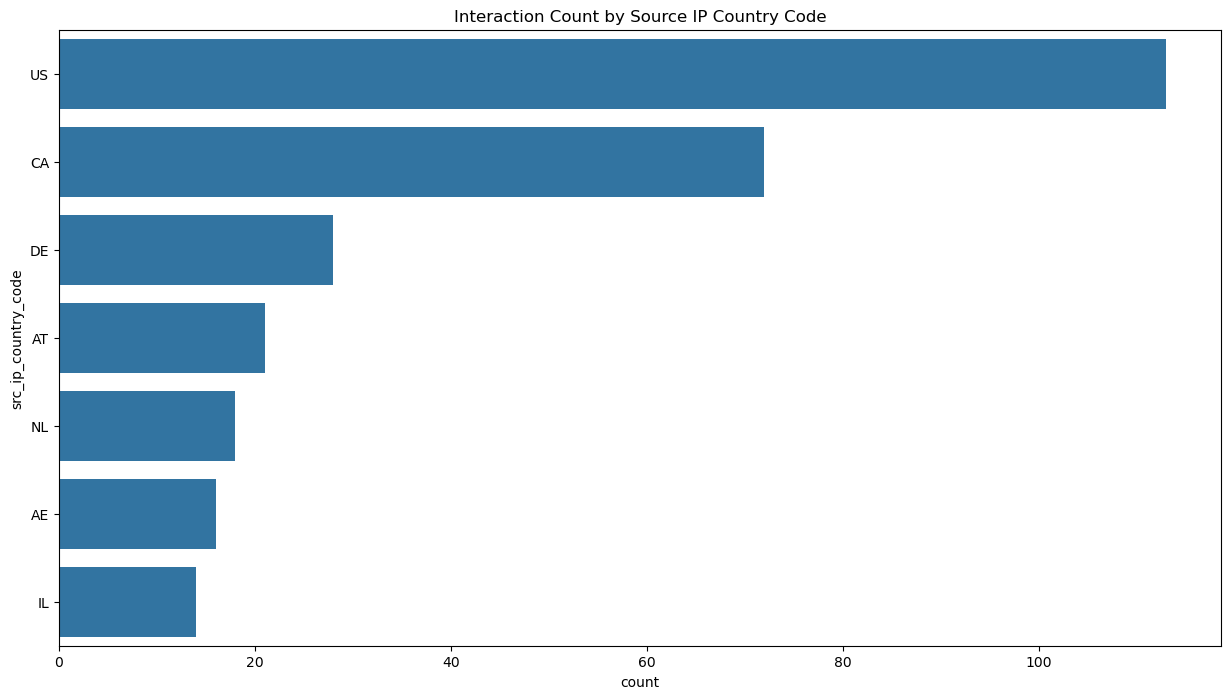

In [37]:
plt.figure(figsize=(15, 8))
sns.countplot(
    y='src_ip_country_code',
    data=df_transformed,
    order=df_transformed['src_ip_country_code'].value_counts().index
)
plt.title('Interaction Count by Source IP Country Code')
plt.show()


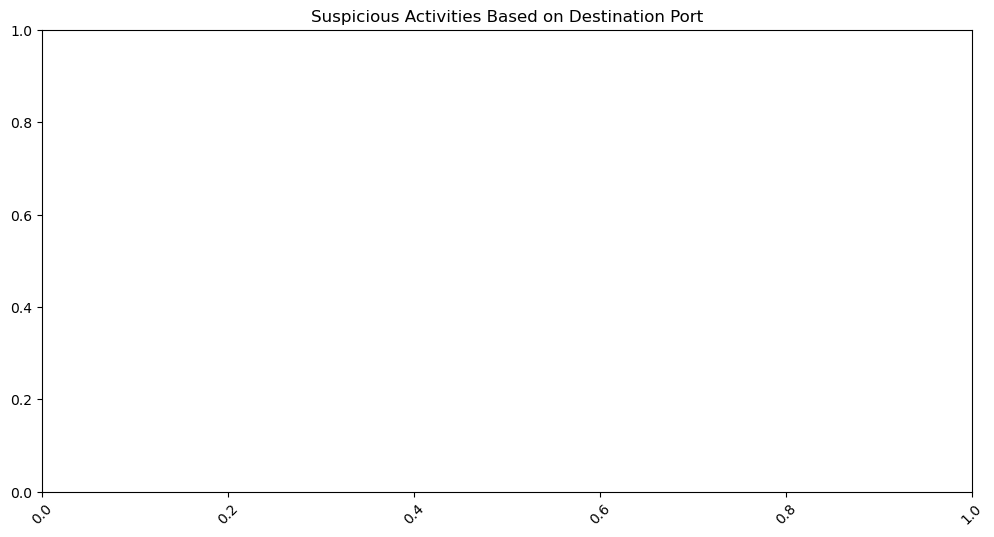

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='dst_port',
    data=df_transformed[df_transformed['detection_types'] == 'Suspicious'],
    palette='coolwarm'
)
plt.title('Suspicious Activities Based on Destination Port')
plt.xticks(rotation=45)
plt.show()


In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bytes_in',
    y='bytes_out',
    hue='anomaly',
    data=df_transformed,
    palette={'Normal': 'green', 'Suspicious': 'red'}
)
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()


ValueError: Could not interpret value `anomaly` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [41]:
from sklearn.ensemble import IsolationForest

features = df_transformed[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]

model = IsolationForest(contamination=0.05, random_state=42)

df_transformed['anomaly'] = model.fit_predict(features)

df_transformed['anomaly'] = df_transformed['anomaly'].apply(lambda x: 'Suspicious' if x == -1 else 'Normal')

print(df_transformed['anomaly'].value_counts())


anomaly
Normal        267
Suspicious     15
Name: count, dtype: int64


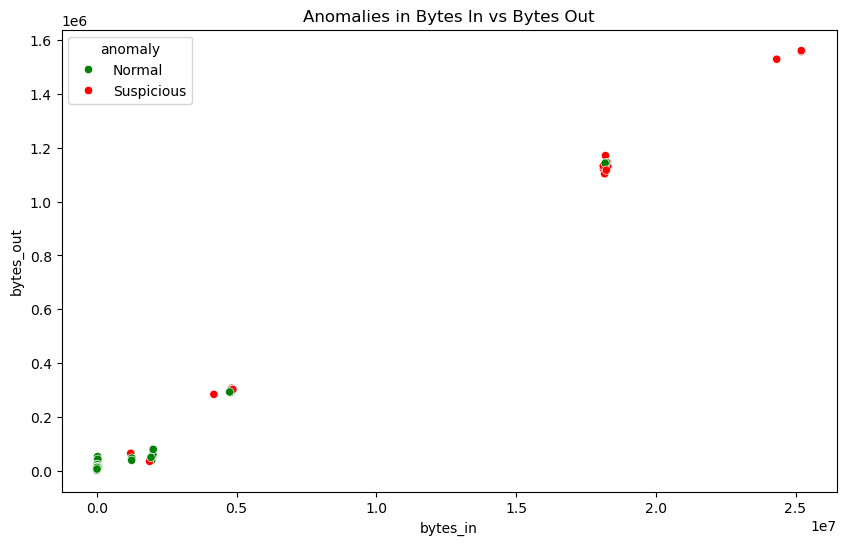

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bytes_in',
    y='bytes_out',
    hue='anomaly',
    data=df_transformed,
    palette={'Normal': 'green', 'Suspicious': 'red'}
)
plt.title('Anomalies in Bytes In vs Bytes Out')
plt.show()


In [43]:
# Green dots → Normal traffic

# Red dots → Suspicious connections detected by Isolation Forest

In [44]:
df_transformed.to_csv("cybersecurity_transformed.csv", index=False)

print("File saved as cybersecurity_transformed.csv")

File saved as cybersecurity_transformed.csv
